In [9]:
import matplotlib.pyplot
import pandas as pd
# CHANGE TO THE LOCATION OF YOUR CSV
df = pd.read_csv("/home/austin/sample.csv")
df = df.set_axis(
    ['tool', 'benchmark', 'campaign', 'configuration', 'partial_order', 'program', 'start_lines', 'end_lines',
     'percent_reduction', 'binary_timer', 'hdd_timer', 'program_timer'], axis=1)
df = df[~(df['program'].str.contains('eclipse'))]
df['full'] = df.tool + df.benchmark + df.campaign + df.partial_order + df.program
df['lines_reduced'] = df.start_lines - df.end_lines
df

,tool,benchmark,campaign,configuration,partial_order,program,start_lines,end_lines,percent_reduction,binary_timer,hdd_timer,program_timer,full,lines_reduced
0,flowdroid,droidbench-small,campaign0,CDG+HDD,codeelimination/REMOVECODE/MST/DEFAULT,ActivityLifecycle1.apk,76,71,6.578947,14,93,112,flowdroiddroidbench-smallcampaign0codeeliminat...,5
1,flowdroid,fossdroid,campaign0,CDG+HDD,aliasflowins/TRUE/MPT/FALSE,com.angrydoughnuts.android.alarmclock_15-relea...,2359,542,77.024163,71,1946,2025,flowdroidfossdroidcampaign0aliasflowins/TRUE/M...,1817


## Figure 7

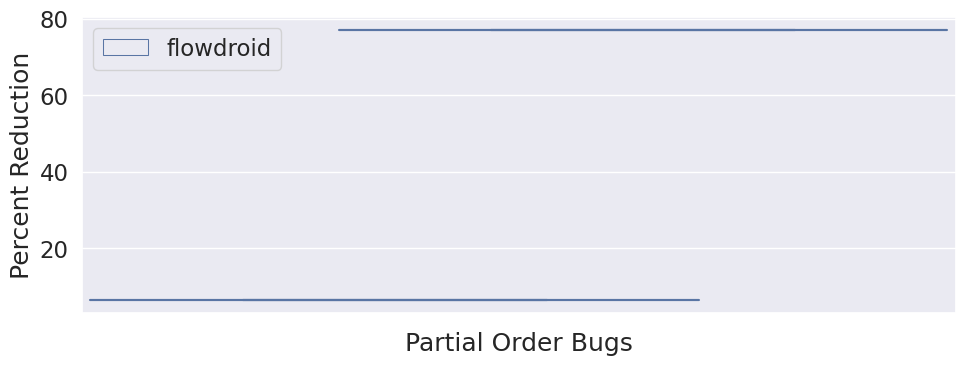

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(font_scale=1.5)
plt.close("all")
fig, ax = plt.subplots(1,1, figsize=(10,4))
(debug := df[df['configuration'] == 'CDG+HDD'].sort_values('tool'))
sns.boxplot(ax=ax, x='partial_order', y='percent_reduction', hue='tool', data=debug, width=2.5)

box_patches = [patch for patch in ax.patches if type(patch) == matplotlib.patches.PathPatch]
if len(box_patches) == 0:  # in matplotlib older than 3.5, the boxes are stored in ax2.artists
    box_patches = ax.artists
num_patches = len(box_patches)
lines_per_boxplot = len(ax.lines) // num_patches
for i, patch in enumerate(box_patches):
    # Set the linecolor on the patch to the facecolor, and set the facecolor to None
    col = patch.get_facecolor()
    patch.set_edgecolor(col)
    patch.set_facecolor('None')

    # Each box has associated Line2D objects (to make the whiskers, fliers, etc.)
    # Loop over them here, and use the same color as above
    for line in ax.lines[i * lines_per_boxplot: (i + 1) * lines_per_boxplot]:
        line.set_color(col)
        line.set_mfc(col)  # facecolor of fliers
        line.set_mec(col)  # edgecolor of fliersaxs[0].set_xticklabels('')
ax.set_xticklabels('')
ax.margins(x=0.01)
ax.set_xlabel('Partial Order Bugs')
ax.set_ylabel('Percent Reduction')

ax.legend(loc='upper left')
for legpatch in ax.legend_.get_patches():
    col = legpatch.get_facecolor()
    legpatch.set_edgecolor(col)
    legpatch.set_facecolor('None')
fig.tight_layout()
plt.show()
fig.savefig("/home/austin/git/ECSTATIC_paper/figs/delta_boxplot.pdf", format='pdf')

## Figure 8

(Note this will only work if you have both HDD-ONLY and CDG+HDD results).

KeyError: 'HDD_ONLY'

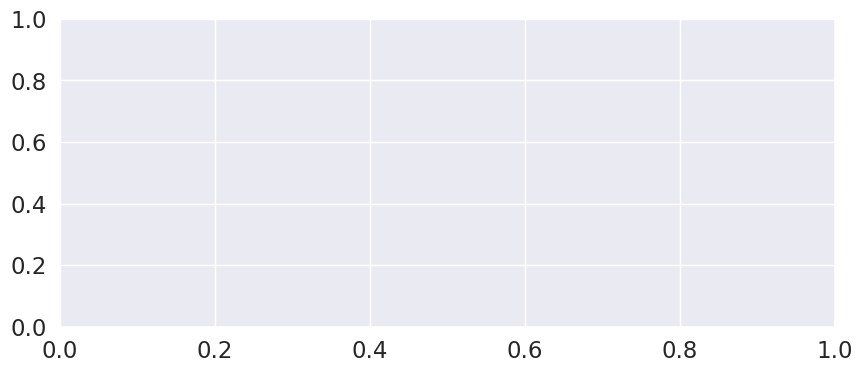

In [11]:
plt.close("all")
fig, ax = plt.subplots(1,1, figsize=(10,4))
pvt = df[(df.benchmark == 'dacapo-2006') | (df.benchmark == 'fossdroid')].pivot_table(index='full',
                                                                                      columns='configuration',
                                                                                      values='percent_reduction').reset_index()
pvt = pvt[~(pvt['CDG+HDD'].isna()) & ~(pvt['HDD_ONLY'].isna())]
print(pvt['HDD_ONLY'].mean())
print(pvt['CDG+HDD'].max())
pvt = pd.melt(pvt, id_vars='full', value_vars=['CDG+HDD', 'HDD_ONLY'])
sns.barplot(ax=ax, x='full', y='value', hue='configuration', data=pvt)
ax.set_xticklabels('')
ax.set_xlabel('Real-world Violations')
ax.set_ylabel('Percent Reduction')
ax.legend(loc='upper left', bbox_to_anchor=(0.04, 1))

fig.tight_layout()
plt.show()
fig.savefig("/home/austin/git/ECSTATIC_paper/figs/cdg_hdd_comparison.pdf", format='pdf')

In [ ]:
print(f"Average CDG+HDD reduction is {df[df['configuration']=='CDG+HDD']['lines_reduced'].mean()}")
print(f"Average HDD reduction is {df[df['configuration'] == 'HDD_ONLY']['lines_reduced'].mean()}")

dft = df[(df.benchmark == 'dacapo-2006') | (df.benchmark == 'fossdroid')]
print(f"Average CDG+HDD reduction for real world is {dft[(dft['configuration']=='CDG+HDD')]['lines_reduced'].mean()}")
print(f"Average HDD reduction is {dft[dft['configuration'] == 'HDD_ONLY']['lines_reduced'].mean()}")